In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn
from torch.utils import data
from eegnet_repl.dataset import build_dataset_from_preprocessed

2026-01-14 15:47:26,778 - __init__.py - <module> - DEBUG - Creating converter from 7 to 5
2026-01-14 15:47:26,779 - __init__.py - <module> - DEBUG - Creating converter from 5 to 7
2026-01-14 15:47:26,779 - __init__.py - <module> - DEBUG - Creating converter from 7 to 5
2026-01-14 15:47:26,780 - __init__.py - <module> - DEBUG - Creating converter from 5 to 7
2026-01-14 15:47:27,368 - base.py - __new__ - DEBUG - No description found for dataset BaseDataset. Complete the appropriate moabb/datasets/summary_*.csv file
2026-01-14 15:47:27,369 - base.py - __new__ - DEBUG - No description found for dataset BaseBIDSDataset. Complete the appropriate moabb/datasets/summary_*.csv file
2026-01-14 15:47:27,370 - base.py - __new__ - DEBUG - No description found for dataset LocalBIDSDataset. Complete the appropriate moabb/datasets/summary_*.csv file
2026-01-14 15:47:27,371 - base.py - __new__ - DEBUG - No description found for dataset CompoundDataset. Complete the appropriate moabb/datasets/summary_*.

# Load processed data

In [2]:
dataset = build_dataset_from_preprocessed(src='kaggle', subject=1)

2026-01-14 15:47:29,094 - dataset.py - build_dataset_from_preprocessed - INFO - Building dataset from preprocessed data in D:\!Studying\NeuroData\DS_n_advanced_python\HW\Final_project_DS\code\EEGNetReplication\data\processed
2026-01-14 15:47:29,095 - dataset.py - build_dataset_from_preprocessed - INFO - Found 1 preprocessed files for subject 1


Opening raw data file D:\!Studying\NeuroData\DS_n_advanced_python\HW\Final_project_DS\code\EEGNetReplication\data\processed\A01T-preprocessed.fif...
    Range : 0 ... 344333 =      0.000 ...  2690.102 secs
Ready.
Reading 0 ... 344333  =      0.000 ...  2690.102 secs...
Used Annotations descriptions: [np.str_('1023'), np.str_('1072'), np.str_('276'), np.str_('277'), np.str_('32766'), np.str_('768'), np.str_('769'), np.str_('770'), np.str_('771'), np.str_('772')]


D:\!Studying\NeuroData\DS_n_advanced_python\HW\Final_project_DS\code\EEGNetReplication\src\eegnet_repl\dataset.py:163: RuntimeWarning: This filename (D:\!Studying\NeuroData\DS_n_advanced_python\HW\Final_project_DS\code\EEGNetReplication\data\processed\A01T-preprocessed.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  pp = mne.io.read_raw_fif(file, preload=True)


Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 257 original time points ...
0 bad epochs dropped


In [3]:
dataset.X.shape

(288, 22, 257)

In [4]:
train_data, val_data = data.random_split(dataset=dataset,lengths=[0.8,0.2])

In [5]:
# 2.1. create data loader for the trainset (batch_size=64, shuffle=True)
train_loader = data.DataLoader(train_data, batch_size=32, shuffle=True)

# 2.2. create data loader for the valset (batch_size=64, shuffle=False)
val_loader = data.DataLoader(val_data, batch_size=32, shuffle=False)

In [6]:
dataiter = iter(train_loader)
batch_eeg, batch_labels = next(dataiter)

In [7]:
batch_eeg.shape

torch.Size([32, 22, 257])

In [8]:
batch_eeg[0,0,0]

tensor(0.1883, dtype=torch.float64)

In [9]:
test = batch_eeg.float()
test[0,0,0].dtype

torch.float32

In [10]:
batch_labels

tensor([ 8,  7, 10,  9, 10,  8, 10,  8, 10, 10,  9,  7,  8,  9,  8,  8,  7, 10,
        10,  7,  8, 10, 10,  9, 10,  9, 10, 10,  8,  9,  7, 10])

2026-01-14 15:47:29,544 - pyplot.py - switch_backend - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2026-01-14 15:47:29,546 - pyplot.py - switch_backend - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2026-01-14 15:47:29,551 - font_manager.py - _findfont_cached - DEBUG - findfont: Matching serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
2026-01-14 15:47:29,553 - font_manager.py - _findfont_cached - DEBUG - findfont: score(FontEntry(fname='d:\\!Studying\\NeuroData\\DS_n_advanced_python\\HW\\Final_project_DS\\code\\EEGNetReplication\\.eegnetenv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2026-01-14 15:47:29,553 - font_manager.py - _findfont_cached - DEBUG - findfont: score(FontEntry(fname='d:\\!Studying\\NeuroData\\DS_n_advanced_python\\HW\\Final_pr

2026-01-14 15:47:30,135 - font_manager.py - _findfont_cached - DEBUG - findfont: Matching serif:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0.
2026-01-14 15:47:30,136 - font_manager.py - _findfont_cached - DEBUG - findfont: score(FontEntry(fname='d:\\!Studying\\NeuroData\\DS_n_advanced_python\\HW\\Final_project_DS\\code\\EEGNetReplication\\.eegnetenv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2026-01-14 15:47:30,137 - font_manager.py - _findfont_cached - DEBUG - findfont: score(FontEntry(fname='d:\\!Studying\\NeuroData\\DS_n_advanced_python\\HW\\Final_project_DS\\code\\EEGNetReplication\\.eegnetenv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneralBol.ttf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2026-01-14 15:47:30,138 - font_manager.py

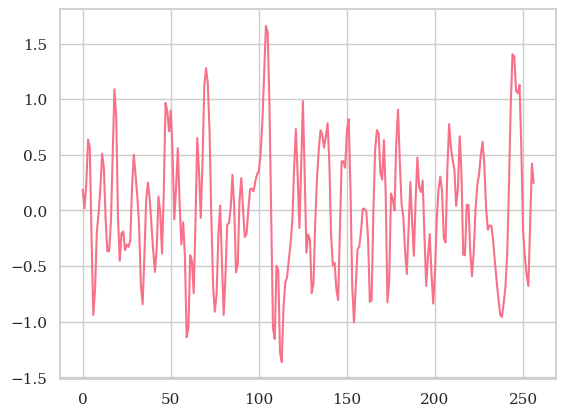

In [11]:
plt.plot(batch_eeg[0,0,:])

In [12]:
df = pd.DataFrame(batch_eeg[0].T)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       257 non-null    float64
 1   1       257 non-null    float64
 2   2       257 non-null    float64
 3   3       257 non-null    float64
 4   4       257 non-null    float64
 5   5       257 non-null    float64
 6   6       257 non-null    float64
 7   7       257 non-null    float64
 8   8       257 non-null    float64
 9   9       257 non-null    float64
 10  10      257 non-null    float64
 11  11      257 non-null    float64
 12  12      257 non-null    float64
 13  13      257 non-null    float64
 14  14      257 non-null    float64
 15  15      257 non-null    float64
 16  16      257 non-null    float64
 17  17      257 non-null    float64
 18  18      257 non-null    float64
 19  19      257 non-null    float64
 20  20      257 non-null    float64
 21  21      257 non-null    float64
dtypes:

2026-01-14 15:47:30,737 - category.py - update - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2026-01-14 15:47:30,747 - category.py - update - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


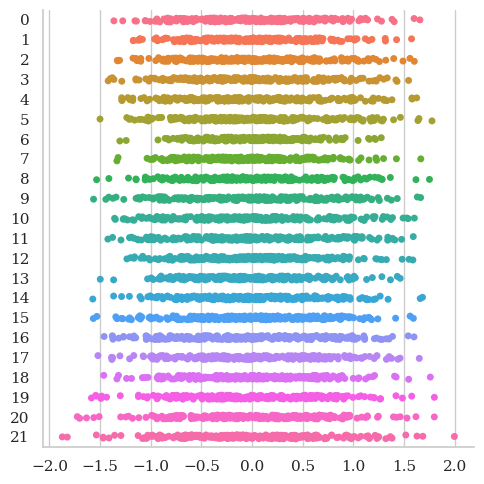

In [13]:
sns.catplot(data=df,kind='strip', orient='y')

# Architecture

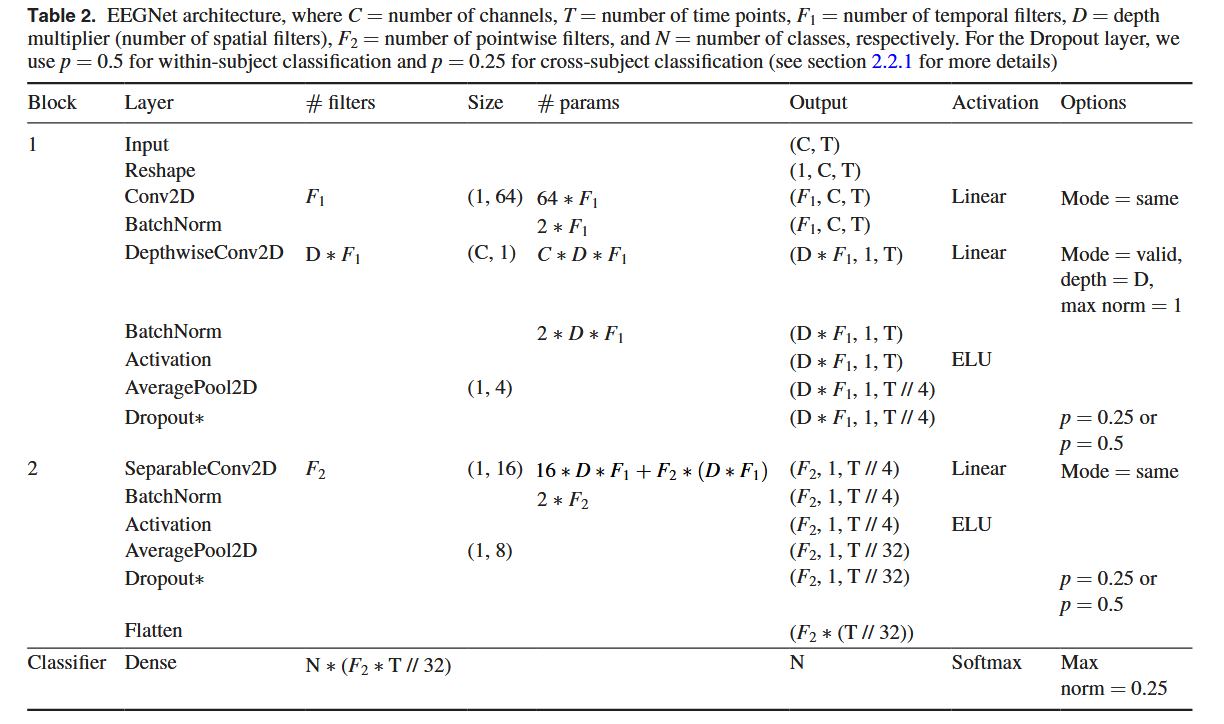

**EEGNet-8,2 parameters:**

F1 = 8 -> temporal filters

D = 2 -> spatial filters

F2 = F1*D -> pointwise convolutions, can be any number but authors choose this

In [14]:
# Define model
class reEEGNet(nn.Module):
    def __init__(self, C, T, F1=8, D=2, p=0.5):
        # C = number of channels, input.shape[1], C = 22 based on 02_preprocessing_pipeline
        # T = number of timepoints per batch, input.shape[2], T = 257 based on 02_preprocessing_pipeline
        # F1 = temporal filters
        # D = spatial filters
        # p = dropout probability: 0.5 for within-subject classification, 0.25 for cross-subject classification

        super().__init__()
        F2 = F1*D # pointwise convolutions, can be any number but authors choose this
        self.temporal = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=F1,
                kernel_size=(1,32),
                padding='same', # keeps initial dims per channel
                groups=1, # default
                bias=False # "We omit the use of bias units in all convolutional layers."
            ),
            # Linear activation = do nothing?
            nn.BatchNorm2d(num_features=F1)) # "We apply batch normalization along the feature map dimension"
        
        self.spatial = nn.Conv2d(
            in_channels=F1,
            out_channels=D*F1,
            kernel_size=(C,1), 
            padding='valid', # no padding -> collapses channel dimension
            groups=F1, # produces depthwise convolution
            bias=False # "We omit the use of bias units in all convolutional layers."
            )
        # "We also regularize each spatial filter by using a maximum norm constraint of 1 on its weights"
        max_norm_value = 1.0 
        self.spatial.weight.register_hook(lambda x: torch.clamp(x, min=-max_norm_value, max=max_norm_value))

        self.aggregation = nn.Sequential(
            nn.BatchNorm2d(num_features=D*F1), # "We apply batch normalization along the feature map dimension"
            nn.ELU(),
            nn.AvgPool2d(kernel_size=(1,4)), # default stride = kernel_size 
            nn.Dropout(p=p)
        )

        self.block_2 = nn.Sequential(
            nn.Conv2d( # depthwise part of separable convolution
            in_channels=D*F1,
            out_channels=D*F1,
            kernel_size=(1,16), 
            padding='same', # keeps initial dims per channel
            groups=D*F1, # produces depthwise convolution
            bias=False # "We omit the use of bias units in all convolutional layers."
            ),
            nn.Conv2d( # pointwise part of separable convolution
            in_channels=D*F1,
            out_channels=F2,
            kernel_size=(1,1), 
            padding='same', # keeps initial dims per channel, shouldn't matter in this case
            groups=1, # default
            bias=False # "We omit the use of bias units in all convolutional layers."
            ),
            # Linear activation = do nothing?
            nn.BatchNorm2d(num_features=F2), # "We apply batch normalization along the feature map dimension"
            nn.ELU(),
            nn.AvgPool2d(kernel_size=(1,8)), # default stride = kernel_size
            nn.Dropout(p=p),
            nn.Flatten()
        )

        self.classifier = nn.Linear(
                in_features=F2*(T//32),
                out_features=4, # number of classes
                bias=True # since it's not a convolutional layer..?
            )
        max_norm_value_1 = 0.25 
        self.classifier.weight.register_hook(lambda x: torch.clamp(x, min=-max_norm_value_1, max=max_norm_value_1))
        
        # nn.Softmax(dim=1) # dim = 0 is for batch number; comented out because of nn.CrossEntropyLoss() documentation:
        # "The input is expected to contain the unnormalized logits for each class (which do not need to be positive or sum to 1, in general)."



    def forward(self, x):
        x = torch.unsqueeze(x,dim=1) # inserts new dim at specified position, shape = (n_batches, C, T) -> shape = (n_batches, 1, C, T)
        filter_bank = self.temporal(x)
        spatial_pattern = self.spatial(filter_bank)
        block_1_out = self.aggregation(spatial_pattern)
        block_2_out = self.block_2(block_1_out)
        output = self.classifier(block_2_out)
        
        return output

In [15]:
model = reEEGNet(C=dataset.X.shape[1], T=dataset.X.shape[2])

In [16]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor])

Model's state_dict:
temporal.0.weight 	 tensor([[[[ 1.2244e-01, -2.0086e-02, -1.6999e-01, -6.8158e-03,  1.7141e-01,
           -1.6949e-01, -1.7594e-01,  9.5230e-02,  4.9094e-02, -1.6545e-01,
            1.4998e-02, -8.9035e-02,  1.0441e-01,  1.0290e-01, -1.7391e-01,
           -7.6780e-02, -9.9845e-02,  1.5135e-01,  9.2857e-02,  5.7178e-02,
           -8.7877e-02, -1.4359e-01,  5.4477e-02,  1.8010e-02,  1.4316e-01,
           -1.6043e-01,  1.3250e-01, -8.6231e-02,  1.6078e-01, -1.0832e-01,
            9.7836e-02,  4.8582e-02]]],


        [[[ 8.7173e-02,  8.3200e-02, -1.3094e-01, -1.3847e-02, -7.3124e-02,
            5.3607e-02,  5.1705e-02,  2.3060e-02, -2.2586e-02,  1.9486e-02,
            9.1291e-02,  1.1992e-01,  1.0322e-01, -7.1804e-02,  1.0812e-01,
           -1.5202e-02,  7.4764e-02, -1.5476e-04,  7.2607e-02,  7.8452e-02,
           -3.3487e-02, -1.6986e-01,  1.4152e-01,  3.4504e-02,  1.2075e-01,
            1.2374e-02,  7.9397e-02, -1.2942e-01, -9.2136e-02, -1.2915e-02,
      

In [17]:
print(model.parameters())

<generator object Module.parameters at 0x000001CAC6845120>


# Training

"We run 500 training iterations (epochs) and perform validation stopping, saving the model weights which produced the lowest validation set loss."

In [18]:
loss_fn = nn.CrossEntropyLoss() # "minimizing the categorical cross-entropy loss function"

# "We fit the model using the Adam optimizer, using default parameters as described in [75]"
# they used tensorflow, for parameters shared with pytorch only eps is slightly different
optimizer = torch.optim.Adam(
    params = model.parameters(),
    eps=1e-07, # the only change from default eps=1e-8, shouldn't matter I think
    foreach=None, # default, "If memory is prohibitive, batch fewer parameters through the optimizer at a time or switch this flag to False"
    fused=None, # default, "To force running the for-loop implementation, pass False for either foreach or fused."
    )

In [19]:
def train(model, optimizer, loss_fn, train_loader, val_loader, nepochs=500):
    '''
    Train a pytorch model and evaluate it every epoch.
    Params:
    model - a pytorch model to train
    optimizer - an optimizer
    loss_fn - the criterion (loss function)
    nepochs - number of training epochs
    train_loader - dataloader for the trainset
    val_loader - dataloader for the valset

    Returns: 
    1. state_dict of the model with the lowest validation loss, 
    2. list of train losses,
    3. list of validation losses.
    '''
    
    train_losses, val_losses = [], []
    best_model = model.state_dict()

    for e in range(nepochs):
        running_loss = 0
        running_val_loss = 0
        for signals, labels in train_loader: # signals = (batch, C, T), labels = (batch, label)

            # Map the old values (7, 8, 9, 10) to new values (0, 1, 2, 3) -> need to change data processing later
            new_labels = torch.zeros_like(labels)
            new_labels[labels == 7] = 0
            new_labels[labels == 8] = 1
            new_labels[labels == 9] = 2
            new_labels[labels == 10] = 3
            
            signals = signals.float() # added to avoid dtype mismatch error
            # Training pass
            model.train() # set model in train mode
            preds = model(signals)
            loss = loss_fn(preds,new_labels)

            running_loss += loss.item()

            # Backpropagation
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

    #else:
        val_loss = 0
        # Evalaute model on validation at the end of each epoch.
        with torch.no_grad():
            for signals, labels in val_loader: # signals = (batch, C, T), labels = (batch, label)

                # Map the old values (7, 8, 9, 10) to new values (0, 1, 2, 3) -> need to change data processing later
                new_labels = torch.zeros_like(labels)
                new_labels[labels == 7] = 0
                new_labels[labels == 8] = 1
                new_labels[labels == 9] = 2
                new_labels[labels == 10] = 3

                signals = signals.float() # added to avoid dtype mismatch error
                preds = model(signals)
                val_loss = loss_fn(preds,new_labels)

                running_val_loss += val_loss.item()

        # track train loss and validation loss
        train_losses.append(running_loss/len(train_loader))
        val_losses.append(running_val_loss/len(val_loader))

        if running_val_loss == np.min(np.array(val_losses)):
            best_model = model.state_dict()

        if e%50==0:
            print("Epoch: {}/{}.. ".format(e+1, nepochs),
            "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
            "Validation Loss: {:.3f}.. ".format(running_val_loss/len(val_loader)))

    return best_model, train_losses, val_losses

In [20]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")
best_model, train_losses, val_losses = train(model, optimizer, loss_fn, train_loader, val_loader, nepochs=51)

Using cpu device


d:\!Studying\NeuroData\DS_n_advanced_python\HW\Final_project_DS\code\EEGNetReplication\.eegnetenv\Lib\site-packages\torch\nn\modules\conv.py:543: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\Convolution.cpp:1032.)
  return F.conv2d(


Epoch: 1/51..  Training Loss: 1.409..  Validation Loss: 1.387.. 
Epoch: 51/51..  Training Loss: 0.827..  Validation Loss: 1.048.. 


In [21]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in best_model:
    print(param_tensor, "\t", best_model[param_tensor])

Model's state_dict:
temporal.0.weight 	 tensor([[[[ 7.2092e-02, -5.5585e-02, -2.1507e-01, -9.8945e-02,  6.9613e-02,
           -2.1510e-01, -1.8676e-01,  8.2998e-02,  6.2010e-02, -1.0818e-01,
            7.3253e-02, -8.8191e-02,  4.5537e-02,  2.6109e-02, -2.3832e-01,
           -1.3519e-01, -1.6621e-01,  8.3659e-02,  4.5710e-02,  6.8618e-02,
           -2.6667e-02, -7.9169e-02,  7.5459e-02, -9.0121e-03,  1.0027e-01,
           -2.1186e-01,  6.5904e-02, -1.6348e-01,  9.7805e-02, -1.4172e-01,
            1.0153e-01,  8.7182e-02]]],


        [[[ 1.0735e-01,  1.3813e-01, -4.4091e-02,  5.2848e-02, -8.3398e-02,
           -1.0301e-02, -1.1128e-02, -2.2576e-02, -4.9641e-02,  5.4668e-03,
            9.8853e-02,  1.6604e-01,  1.9203e-01,  3.0089e-03,  1.2607e-01,
           -5.2764e-02,  2.7227e-03, -8.3486e-02, -1.3196e-04,  4.7557e-02,
           -6.0621e-03, -1.1606e-01,  1.8422e-01,  5.0445e-02,  1.0604e-01,
           -4.1258e-02,  1.3941e-02, -1.6068e-01, -7.4674e-02,  2.6063e-02,
      

Text(0, 0.5, 'Loss')

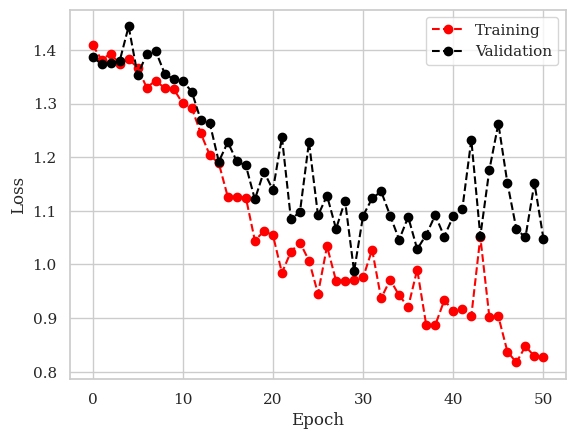

In [22]:
plt.plot(np.arange(len(train_losses)),train_losses,'ro--')
plt.plot(np.arange(len(val_losses)),val_losses,'ko--')
plt.legend(labels=['Training','Validation'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [23]:
#torch.save(best_model, PATH)

## Trying to visualize one of the filters, ignore for now

In [27]:
temporal_filters = best_model['temporal.0.weight']

In [41]:
temp_f_1 = temporal_filters[0,0,0]

In [42]:
temp_f_1.shape[0]

32

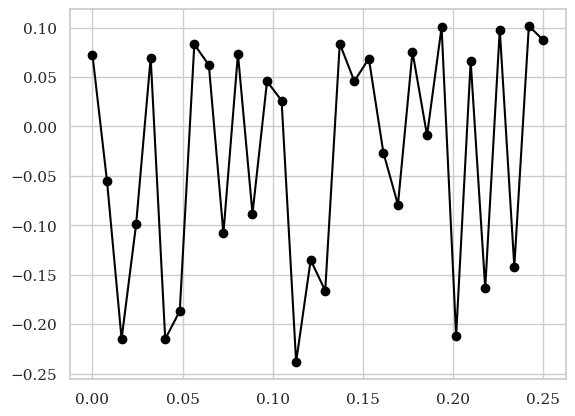

In [ ]:
t = np.linspace(0,0.25,temp_f_1.shape[0]) # filter should cover ~250 ms of input (if input is 257 points and filter is 32 points long)
plt.plot(t, temp_f_1, 'ko-')

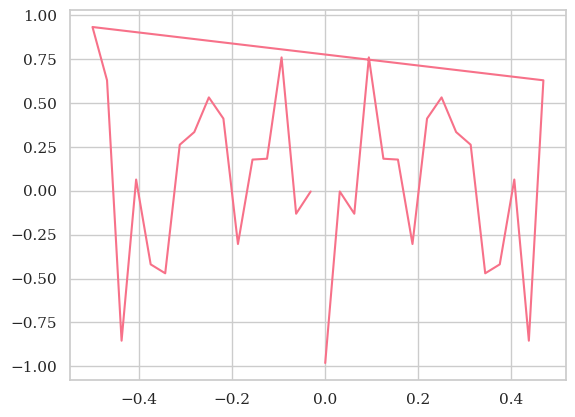

In [57]:
sp = np.fft.fft(temp_f_1)
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, sp.real)
#plt.plot(freq, sp.imag)

In [60]:
def PS(time_signal, f_sampling, method='ps'):
    fft = np.fft.fft(time_signal)
    mag_squared = np.real(fft * np.conjugate(fft))
    f = np.fft.fftfreq(len(time_signal), 1/f_sampling)

    if method == 'psd':
        scaling_factor = 2 / (f_sampling * len(time_signal))
    else:
        scaling_factor = 2 / (len(time_signal)**2) 

    PS = scaling_factor * mag_squared
    return f, PS

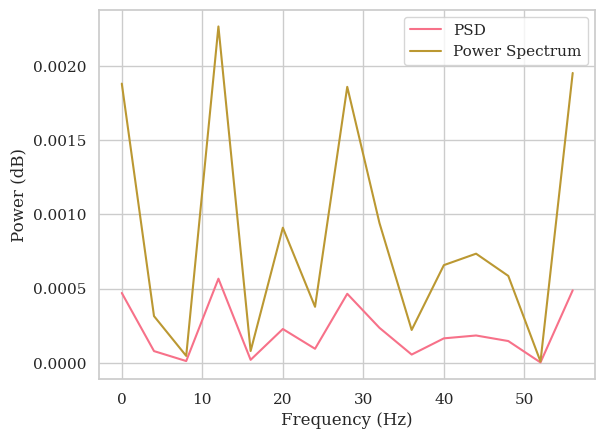

In [61]:
f, ps_version1 = PS(time_signal=temp_f_1, f_sampling=128, method='psd') # Power Spectral Density scaling
f, ps_version2 = PS(time_signal=temp_f_1, f_sampling=128, method='ps')  # Power Spectrum scaling

plt.plot(f[0:len(f)//2-1], ps_version1[0:len(f)//2-1])
plt.plot(f[0:len(f)//2-1], ps_version2[0:len(f)//2-1])
plt.legend(['PSD', 'Power Spectrum'])
plt.ylabel('Power (dB)')
plt.xlabel('Frequency (Hz)')
plt.show()